# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import emoji
import collections
from datetime import datetime
from textblob import TextBlob
# from PIL import Image



# import re
# from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

# Load Data

In [2]:
#open the file

messages = pd.read_pickle('messages.pkl')
messages['created_at'] = pd.to_datetime(messages['created_at'],unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
messages['Date'] = messages['created_at'].dt.strftime('%Y-%m-%d')
messages['Hour'] = messages['created_at'].dt.strftime('%H')
messages['Time'] = messages['created_at'].dt.strftime('%r')


# Analysis

My family has a really active group chat.  Rarely does a day pass that someone doesn't send a message.  Sometimes, I will lose service and return having missed 60+ messages.

With all that data, I thought it would be fun to learn a bit more about my family by looking at their messaging trends.

The family, from my parents to their grandchildren, is comprised of 22 individuals as seen below.  Only 9 of those are active on the group chat (marked in blue).



<img src="files/img/FamilyTree.png">

In [3]:
dicFdf = {}
s = " ~ "
for person, frame in messages.groupby('name'):
    
    dicFdf[person] = []
    dicFdf[person].append(len(frame))
    dicFdf[person].append(len(frame[frame['attachments'].apply(lambda c: c!=[])]))
    dicFdf[person].append(round(len(frame[frame['attachments'].apply(lambda c: c!=[])])/len(frame)*100,2))
    dicFdf[person].append(frame['favorited_by'].str.len().sum())
    dicFdf[person].append(round(frame['favorited_by'].str.len().sum()/len(frame),2))
    dicFdf[person].append(int(frame['text'].str.split().str.len().sum()))
    dicFdf[person].append(round(int(frame['text'].str.split().str.len().sum())/len(frame),2))
    txt = frame['text'].str.cat(sep=' ')
    dicFdf[person].append(txt)
    
    favEmojstr = []
    emojis = ''.join(c for c in txt if c in emoji.UNICODE_EMOJI)
    favEmojis = collections.Counter(emojis).most_common(5)
    favEmojstr.append(s.join([x[0] for x in favEmojis]))
    dicFdf[person].append(len(emojis))
    dicFdf[person].append(len(emojis)/len(frame))
    dicFdf[person].append(favEmojstr)
    
    
    
    
headerlist = ['Number of Messages', 'Attachments', '% Attachments', 
              'Favorites', 'Favorites per Message', 'Total Words', 
              'Words per Message', 'Messages', 'Number of Emojis', 
              'Emojis per Message', 'Favorite Emojis' ]
                          
perPerson = pd.DataFrame.from_dict(dicFdf, columns=headerlist, orient='index')
perPerson

,Number of Messages,Attachments,% Attachments,Favorites,Favorites per Message,Total Words,Words per Message,Messages,Number of Emojis,Emojis per Message,Favorite Emojis
1stDaughter,6149,1147,18.65,12793,2.08,50155,8.16,Az vacay is over on Tuesday morning at 3 am Oh...,6139,0.998374,[😂 ~ 😍 ~ ❤ ~ 🎉 ~ 🙌]
2ndSon,2880,713,24.76,6713,2.33,25267,8.77,2ndsDaughter's interpretation of toothless the...,344,0.119444,[😂 ~ 👍 ~ 😉 ~ 😁 ~ 🎉]
2ndsWife,1297,251,19.35,3077,2.37,14543,11.21,*participant lol what a super weird auto corre...,957,0.737857,[😂 ~ 🎉 ~ 😍 ~ 😁 ~ 😜]
3rdDaughter,2173,283,13.02,3815,1.76,17521,8.06,Hahhahahah Hahahahah In* 4thDaughter is your w...,2885,1.327658,[😍 ~ 😂 ~ 👍 ~ 🎉 ~ ❤]
4thDaughter,3716,1037,27.91,10290,2.77,34604,9.31,Also 1stDaughter's vacay. 1stDaughter's vacay....,78,0.020990,[😭 ~ 😣 ~ 😢 ~ 😨 ~ 😔]
5thSon,1838,485,26.39,4734,2.58,20507,11.16,"Before 5thsSon saw this video, I didn't believ...",157,0.085419,[👍 ~ 😃 ~ 😂 ~ 😉 ~ 😎]
5thsWife,912,331,36.29,3207,3.52,9901,10.86,Our stake is still deciding on how to move for...,1503,1.648026,[😂 ~ 👍 ~ 😍 ~ 😉 ~ 🤩]
Dad,2734,642,23.48,4855,1.78,23602,8.63,Today's Covey-ness. *starting Management is se...,146,0.053402,[😄 ~ 😍 ~ 💞 ~ 🤩 ~ ⛄]
Mom,2541,543,21.37,5891,2.32,19259,7.58,Our bishop said melchizadek priesthood holders...,1789,0.704054,[😂 ~ ❤ ~ 😍 ~ 😊 ~ 🎂]


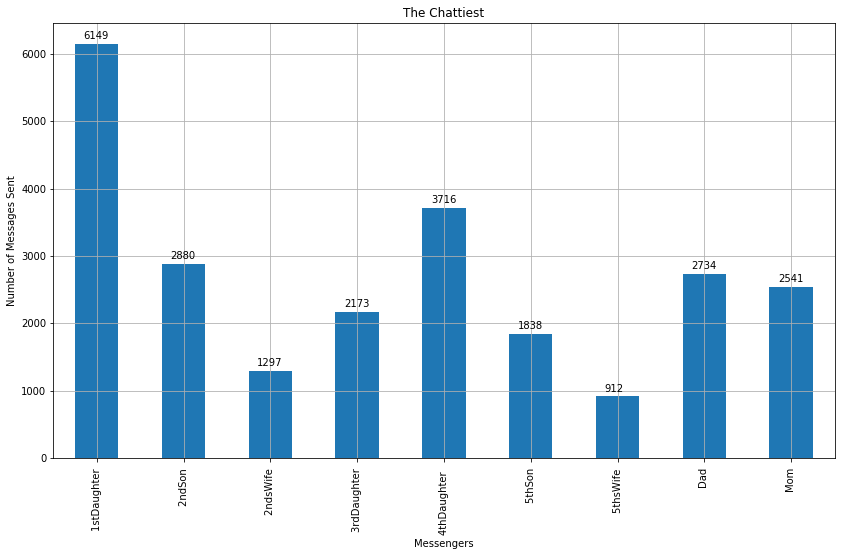

In [4]:
ax = perPerson['Number of Messages'].plot(kind='bar', 
                                grid=True, 
                                figsize=(14,8),
                                title="The Chattiest")
ax.set(xlabel="Messengers", ylabel="Number of Messages Sent")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + .1 , p.get_height() + 75))

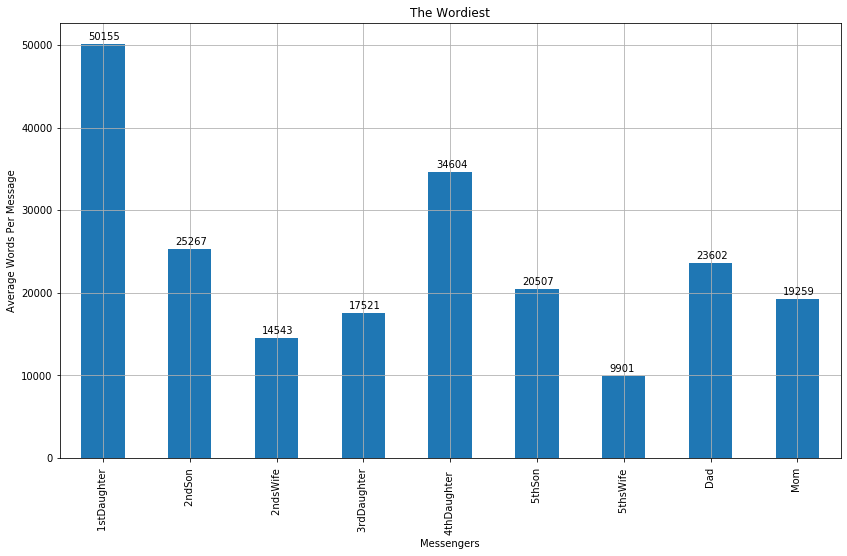

In [5]:
ax = perPerson['Total Words'].plot(kind='bar', 
                                   grid=True, 
                                   figsize=(14,8),
                                   title="The Wordiest")
ax.set(xlabel="Messengers", ylabel="Average Words Per Message")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() + .085, p.get_height() + 500))

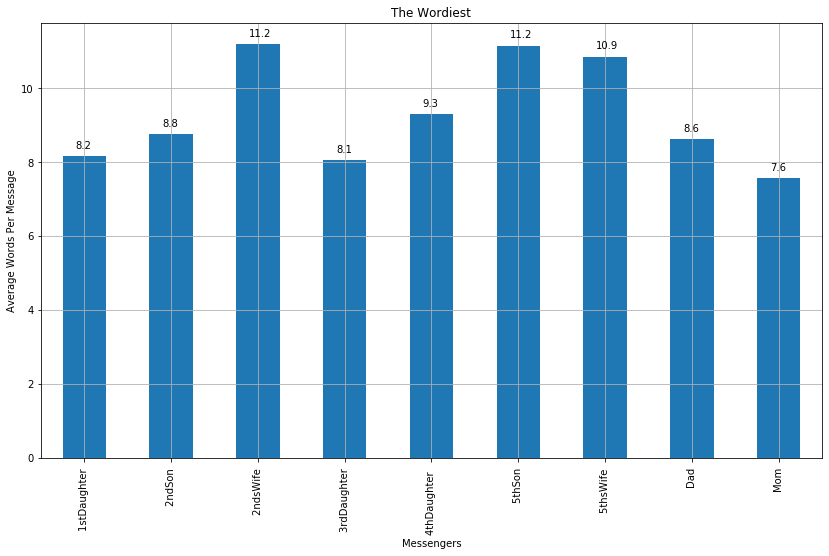

In [6]:
ax = perPerson['Words per Message'].plot(kind='bar', 
                                         grid=True, 
                                         figsize=(14,8),
                                         title="The Wordiest")
ax.set(xlabel="Messengers", ylabel="Average Words Per Message")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() + .15, p.get_height() + .2))

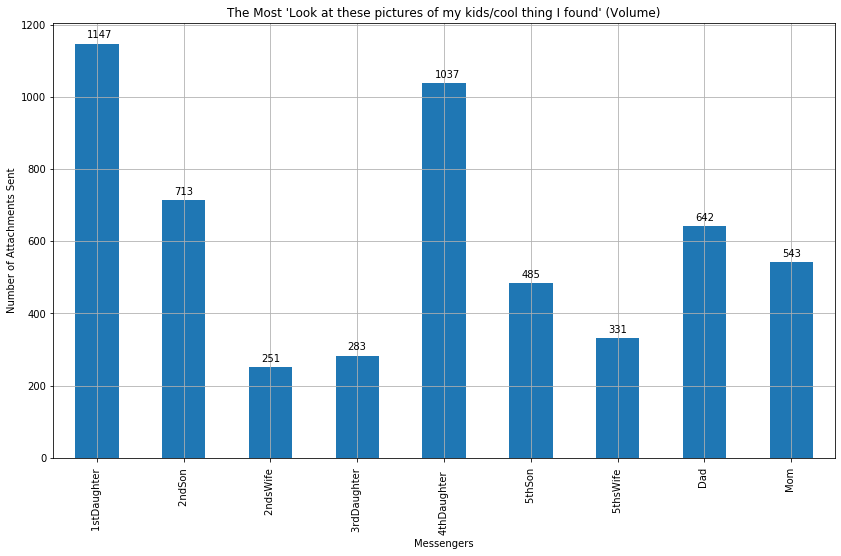

In [7]:
ax = perPerson['Attachments'].plot(kind='bar', 
                                   grid=True, 
                                   figsize=(14,8),
                                   title="The Most 'Look at these pictures of my kids/cool thing I found' (Volume)")
ax.set(xlabel="Messengers", ylabel="Number of Attachments Sent")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + .14, p.get_height() + 15))

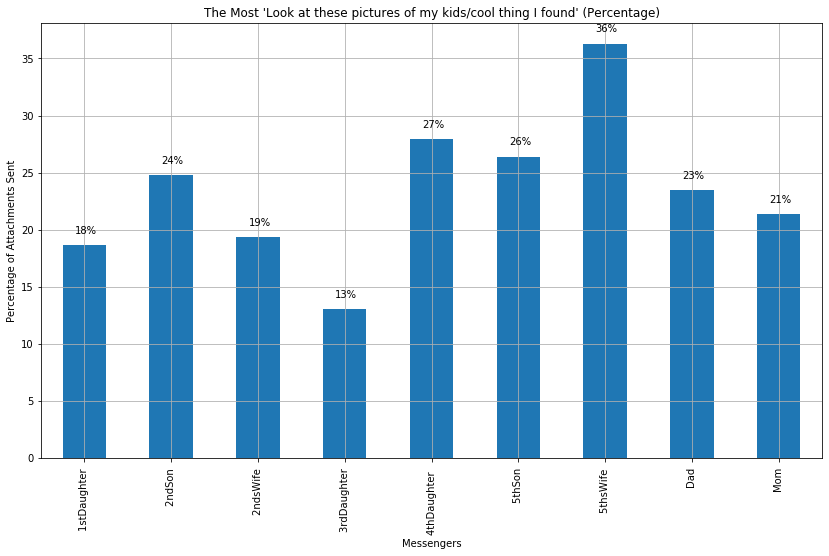

In [8]:
ax = perPerson['% Attachments'].plot(kind='bar', 
                                     grid=True, 
                                     figsize=(14,8),
                                     title="The Most 'Look at these pictures of my kids/cool thing I found' (Percentage)")
ax.set(xlabel="Messengers", ylabel="Percentage of Attachments Sent")
for p in ax.patches:
    ax.annotate(str(int(p.get_height()))+'%', (p.get_x() + .14, p.get_height() + 1))

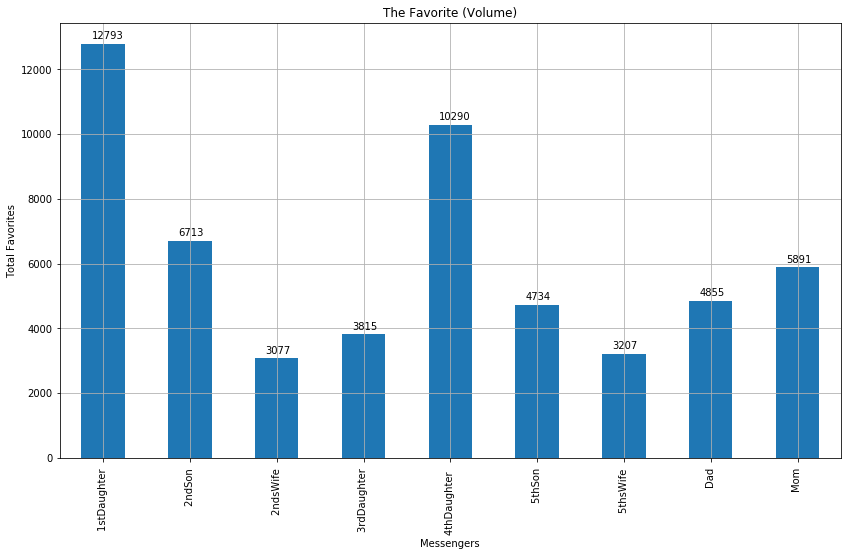

In [9]:
ax = perPerson['Favorites'].plot(kind='bar', grid=True, figsize=(14,8),title="The Favorite (Volume)")
ax.set(xlabel="Messengers", ylabel="Total Favorites")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +.12, p.get_height() +150))

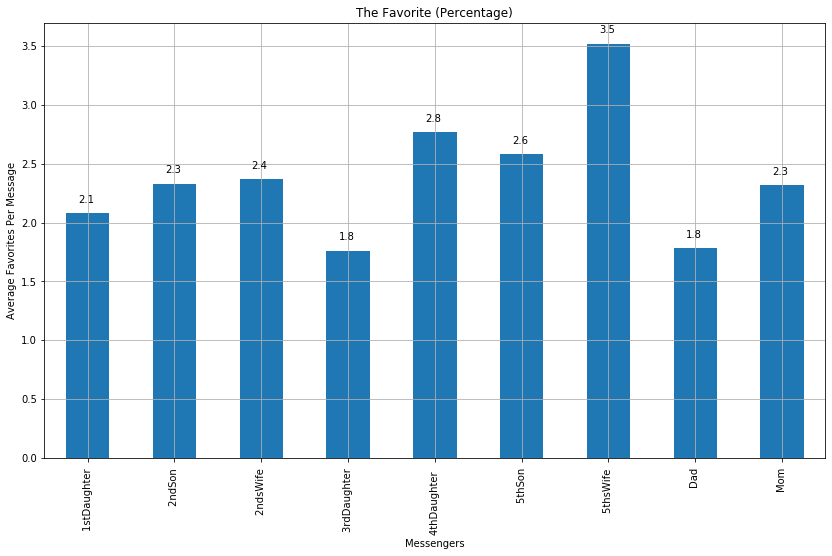

In [10]:
ax = perPerson['Favorites per Message'].plot(kind='bar', 
                                         grid=True, 
                                         figsize=(14,8),
                                         title="The Favorite (Percentage)")
ax.set(xlabel="Messengers", ylabel="Average Favorites Per Message")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() +.14, p.get_height() +.09))

# Analysis of message contents per person

1stDaughter 


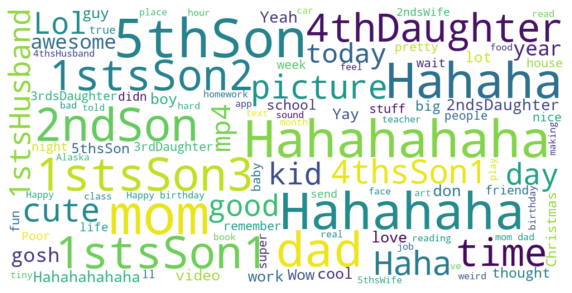

2ndSon 


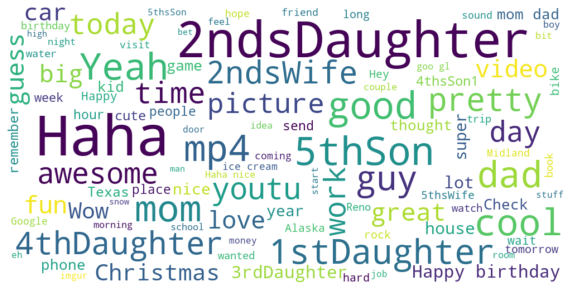

2ndsWife 


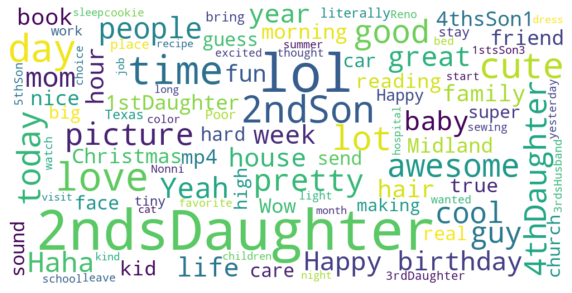

3rdDaughter 


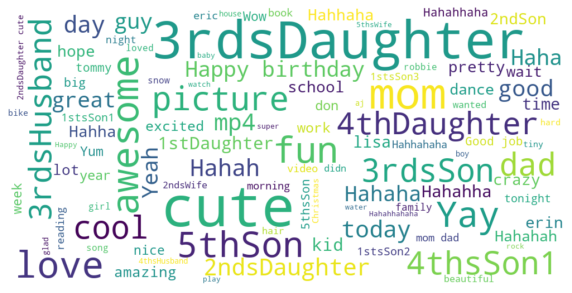

4thDaughter  


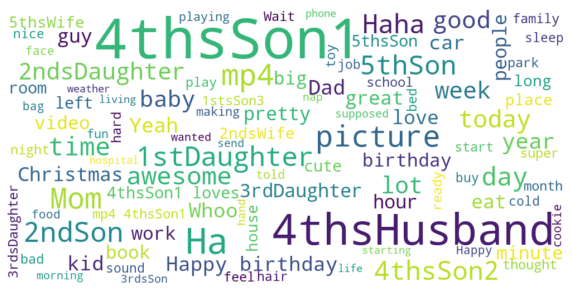

5thSon 


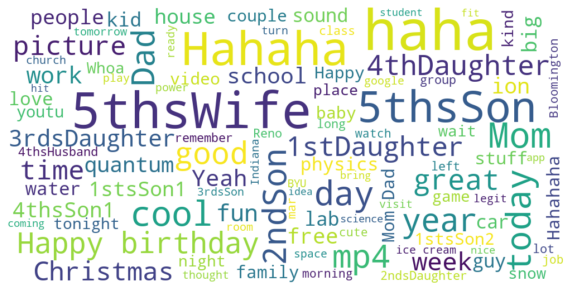

5thsWife 


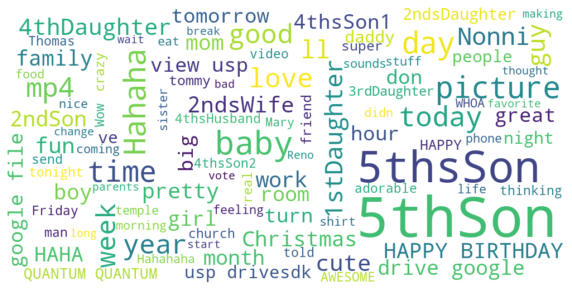

Dad 


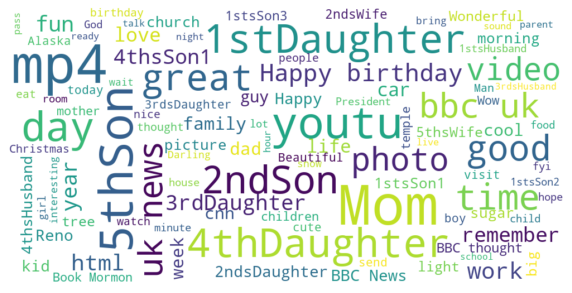

Mom 


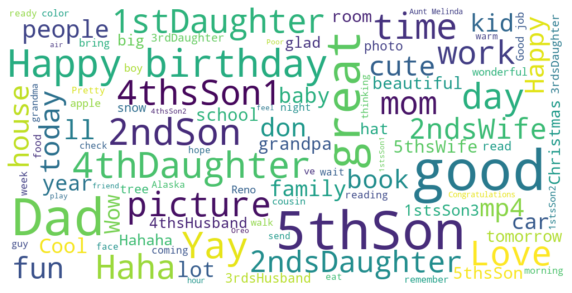

In [11]:
stopwords = set(line.strip() for line in open('stopwords1.txt'))
stopwords = stopwords.union(set(['https','groupme','640x360r90', '568x320r90','http','640x360r','mp4https']))

for x in list(perPerson.index):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, 
                          width=1000, 
                          height=500,
                          max_font_size=100, 
                          max_words=100, 
                          background_color="white").generate(perPerson.loc[x]['Messages'])
    print(x)
    # Display the generated image:
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#     # Save the image in the img folder:
#     wordcloud.to_file("Analbumcover/"+x+"_WC.png")

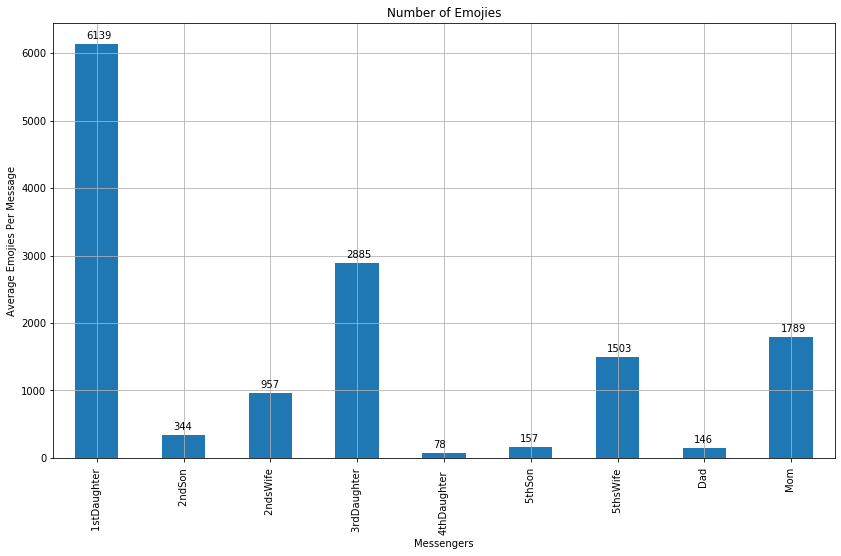

In [12]:
ax = perPerson['Number of Emojis'].plot(kind='bar', 
                                        grid=True, 
                                        figsize=(14,8),
                                        title="Number of Emojies")
ax.set(xlabel="Messengers", ylabel="Average Emojies Per Message")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() + 75))

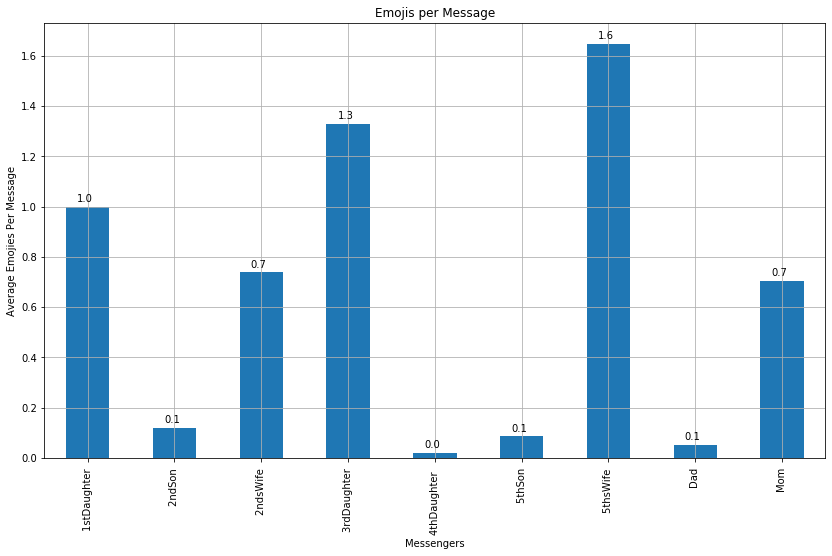

In [13]:
ax = perPerson['Emojis per Message'].plot(kind='bar', 
                                          grid=True, 
                                          figsize=(14,8),
                                          title="Emojis per Message")
ax.set(xlabel="Messengers", ylabel="Average Emojies Per Message")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))

# Analysis of messages through time

In [14]:
messages.head()

,attachments,avatar_url,created_at,event,favorited_by,group_id,id,name,platform,sender_id,sender_type,source_guid,system,text,user_id,Date,Hour,Time
0,"[{'type': 'image', 'url': 'https://i.groupme.c...",https://i.groupme.com/1632x918.png.bab44dae5f4...,2020-03-16 13:25:24-07:00,NaN,[38965011],22733073,158439032402591756,5thSon,gm,38964800,user,android-acb53f2c-2ffd-4463-ab06-f5dae9eb4c76,False,"Before 5thsSon saw this video, I didn't believ...",38964800,2020-03-16,13,01:25:24 PM
1,[],None,2020-03-15 23:13:59-07:00,NaN,[],22733073,158433923979919766,3rdDaughter,gm,38964805,user,B7EF91A8-07A6-4FDE-A7B1-1C252B7F1BD9,False,Hahhahahah Hahahahah,38964805,2020-03-15,23,11:13:59 PM
2,"[{'type': 'image', 'url': 'https://i.groupme.c...",https://i.groupme.com/1152x1440.png.9fa527ff84...,2020-03-15 19:08:15-07:00,NaN,"[38964800, 38964805, 38964806, 38965011, 48321...",22733073,158432449571939827,4thDaughter,gm,25184769,user,android-1f9d264b-e5b3-4b62-a911-e4aa71c80cc6,False,Also 1stDaughter's vacay.,25184769,2020-03-15,19,07:08:15 PM
3,"[{'type': 'image', 'url': 'https://i.groupme.c...",https://i.groupme.com/1152x1440.png.9fa527ff84...,2020-03-15 19:00:17-07:00,NaN,"[38964800, 38964805, 38964806, 38965011, 48321...",22733073,158432401774248650,4thDaughter,gm,25184769,user,android-46847fac-617d-4e05-bbe1-83a1f58af8d4,False,1stDaughter's vacay.,25184769,2020-03-15,19,07:00:17 PM
4,[],https://i.groupme.com/1024x1024.jpeg.99b4d95aa...,2020-03-15 18:08:04-07:00,NaN,"[25184769, 38964800, 38965011]",22733073,158432088429102049,1stDaughter,gm,38964802,user,05EC2C38-540A-46B6-904D-DC7D3EF80C52,False,Az vacay is over on Tuesday morning at 3 am,38964802,2020-03-15,18,06:08:04 PM


In [15]:
personlist = list(perPerson.index)
dicFdf = {}
for day, frame in messages.groupby('Date'):
    dicFdf[day] = []
    dicFdf[day].append(frame['id'].count())
    values = frame['name'].value_counts()
    for person in personlist:
        if person in list(values.index):
            dicFdf[day].append(values.loc[person])
        else:
            dicFdf[day].append(np.nan)
    
headerlist = ['Message Count']+ personlist

daydf = pd.DataFrame.from_dict(dicFdf, columns=headerlist, orient='index')

daydf.head()

,Message Count,1stDaughter,2ndSon,2ndsWife,3rdDaughter,4thDaughter,5thSon,5thsWife,Dad,Mom
2016-06-22,72,7.0,10.0,19.0,3.0,24.0,3.0,NaN,6.0,NaN
2016-06-23,36,9.0,NaN,NaN,NaN,1.0,15.0,NaN,5.0,6.0
2016-06-24,39,15.0,8.0,3.0,NaN,2.0,1.0,NaN,7.0,3.0
2016-06-25,26,7.0,NaN,3.0,8.0,NaN,NaN,NaN,4.0,4.0
2016-06-26,52,12.0,8.0,6.0,3.0,6.0,6.0,NaN,4.0,7.0


In [16]:
monthdf = daydf.reset_index()
monthdf = monthdf.rename(columns={'index':'Date'})
monthdf['Date'] = pd.to_datetime(monthdf['Date'], format="%Y-%m-%d")
monthdf = monthdf.resample('M', on='Date').sum()
for column in list(monthdf.columns)[1:]:
    monthdf['% '+column] = round(monthdf[column]/monthdf['Message Count']*100, 2)
monthdf.head()

,Message Count,1stDaughter,2ndSon,2ndsWife,3rdDaughter,4thDaughter,5thSon,5thsWife,Dad,Mom,% 1stDaughter,% 2ndSon,% 2ndsWife,% 3rdDaughter,% 4thDaughter,% 5thSon,% 5thsWife,% Dad,% Mom
Date,,,,,,,,,,,,,,,,,,,
2016-06-30,254,67.0,28.0,32.0,16.0,33.0,28.0,0.0,29.0,21.0,26.38,11.02,12.60,6.30,12.99,11.02,0.0,11.42,8.27
2016-07-31,404,122.0,58.0,54.0,21.0,56.0,21.0,0.0,41.0,31.0,30.20,14.36,13.37,5.20,13.86,5.20,0.0,10.15,7.67
2016-08-31,438,161.0,47.0,39.0,31.0,42.0,29.0,0.0,60.0,29.0,36.76,10.73,8.90,7.08,9.59,6.62,0.0,13.70,6.62
2016-09-30,398,83.0,77.0,47.0,32.0,52.0,20.0,0.0,59.0,28.0,20.85,19.35,11.81,8.04,13.07,5.03,0.0,14.82,7.04
2016-10-31,749,204.0,94.0,102.0,48.0,82.0,37.0,0.0,89.0,93.0,27.24,12.55,13.62,6.41,10.95,4.94,0.0,11.88,12.42


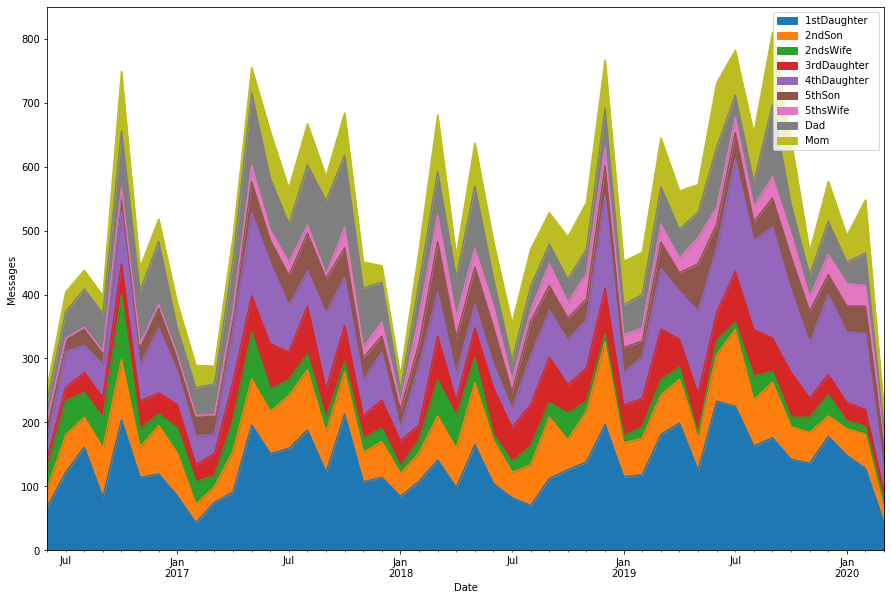

In [17]:
ax = monthdf.plot.area(y=list(monthdf.columns)[1:10],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

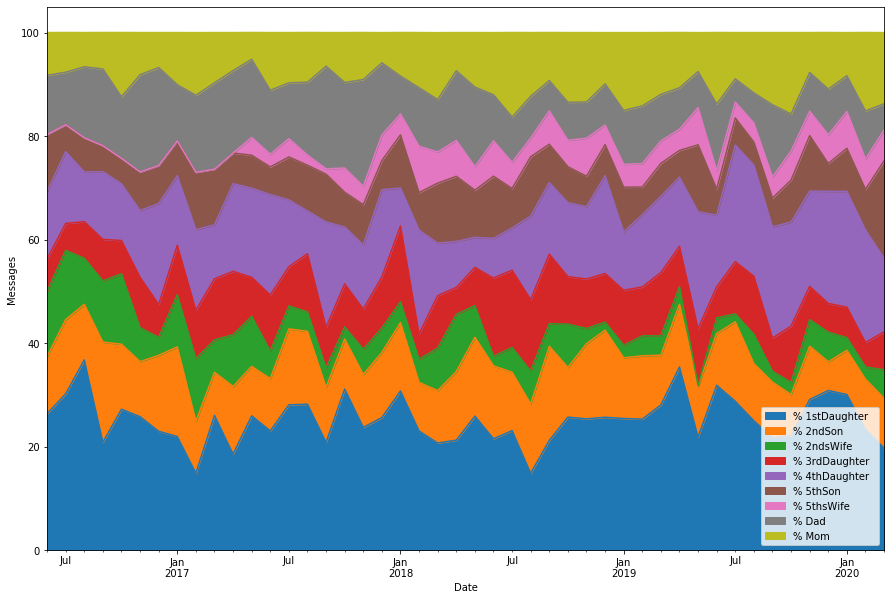

In [18]:
ax = monthdf.plot.area(y=list(monthdf.columns)[10:],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

In [19]:
personlist = list(perPerson.index)
dicFdf = {}
for day, frame in messages.groupby('Hour'):
    dicFdf[day] = []
    dicFdf[day].append(frame['id'].count())
    values = frame['name'].value_counts()
    for person in personlist:
        if person in list(values.index):
            dicFdf[day].append(values.loc[person])
        else:
            dicFdf[day].append(np.nan)
    
headerlist = ['Message Count']+ personlist

hourdf = pd.DataFrame.from_dict(dicFdf, columns=headerlist, orient='index')

hourdf.head()

,Message Count,1stDaughter,2ndSon,2ndsWife,3rdDaughter,4thDaughter,5thSon,5thsWife,Dad,Mom
00,110,100.0,1.0,2.0,NaN,6.0,NaN,NaN,NaN,1
01,31,23.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2
02,18,NaN,4.0,3.0,NaN,NaN,3.0,1.0,2.0,5
03,26,NaN,5.0,1.0,NaN,3.0,10.0,1.0,3.0,3
04,119,2.0,36.0,19.0,2.0,2.0,36.0,3.0,15.0,4


In [20]:
for column in list(hourdf.columns)[1:]:
    hourdf['% '+column] = round(hourdf[column]/hourdf['Message Count']*100, 2)
hourdf.head()

,Message Count,1stDaughter,2ndSon,2ndsWife,3rdDaughter,4thDaughter,5thSon,5thsWife,Dad,Mom,% 1stDaughter,% 2ndSon,% 2ndsWife,% 3rdDaughter,% 4thDaughter,% 5thSon,% 5thsWife,% Dad,% Mom
00,110,100.0,1.0,2.0,NaN,6.0,NaN,NaN,NaN,1,90.91,0.91,1.82,NaN,5.45,NaN,NaN,NaN,0.91
01,31,23.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2,74.19,NaN,NaN,NaN,NaN,NaN,16.13,3.23,6.45
02,18,NaN,4.0,3.0,NaN,NaN,3.0,1.0,2.0,5,NaN,22.22,16.67,NaN,NaN,16.67,5.56,11.11,27.78
03,26,NaN,5.0,1.0,NaN,3.0,10.0,1.0,3.0,3,NaN,19.23,3.85,NaN,11.54,38.46,3.85,11.54,11.54
04,119,2.0,36.0,19.0,2.0,2.0,36.0,3.0,15.0,4,1.68,30.25,15.97,1.68,1.68,30.25,2.52,12.61,3.36


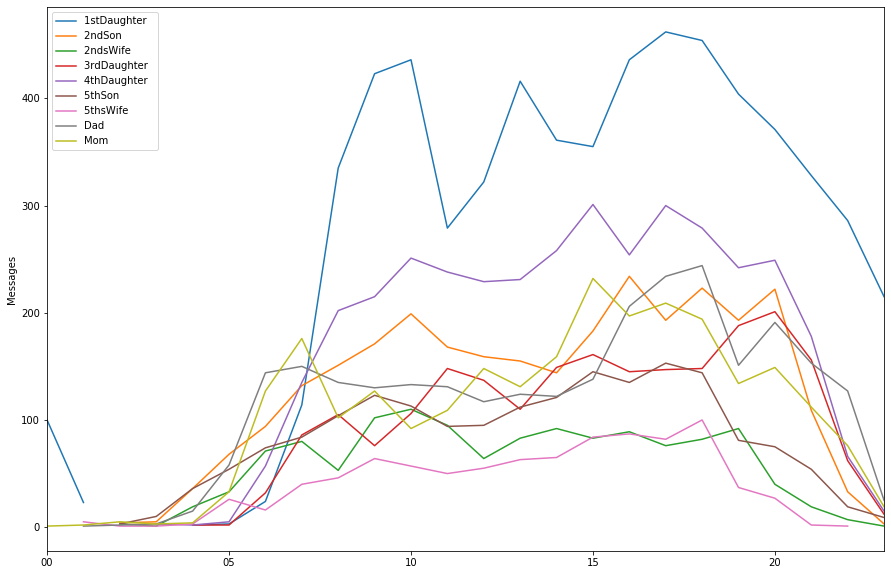

In [21]:
ax = hourdf.plot(y=list(hourdf.columns)[1:10],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

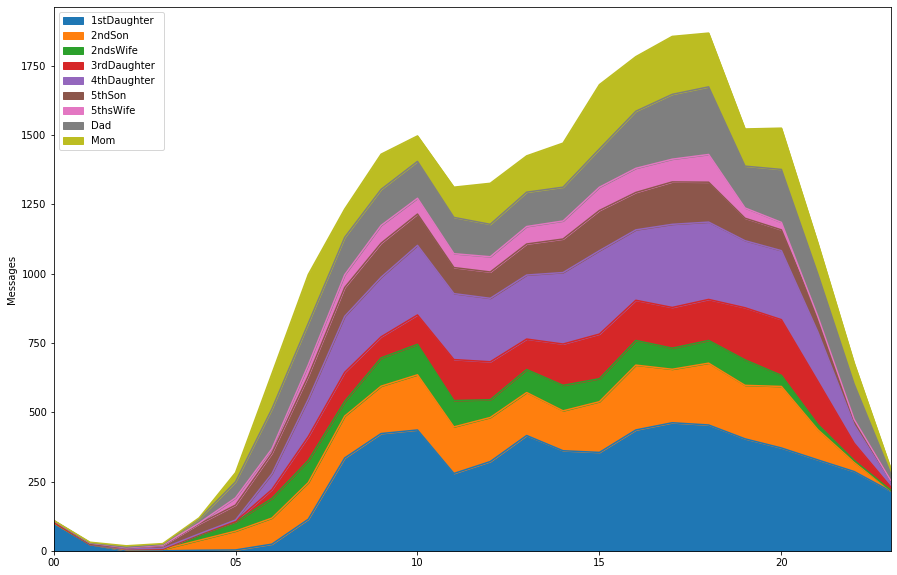

In [22]:
ax = hourdf.plot.area(y=list(hourdf.columns)[1:10],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

# Sentiment

In [23]:
def getsentiment(message):
    if isinstance(message, str):
        analysis = TextBlob(message)
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    else:
        return np.nan

messages['Sentiment'] = messages['text'].apply(getsentiment)

messages.head()

,attachments,avatar_url,created_at,event,favorited_by,group_id,id,name,platform,sender_id,sender_type,source_guid,system,text,user_id,Date,Hour,Time,Sentiment
0,"[{'type': 'image', 'url': 'https://i.groupme.c...",https://i.groupme.com/1632x918.png.bab44dae5f4...,2020-03-16 13:25:24-07:00,NaN,[38965011],22733073,158439032402591756,5thSon,gm,38964800,user,android-acb53f2c-2ffd-4463-ab06-f5dae9eb4c76,False,"Before 5thsSon saw this video, I didn't believ...",38964800,2020-03-16,13,01:25:24 PM,neutral
1,[],None,2020-03-15 23:13:59-07:00,NaN,[],22733073,158433923979919766,3rdDaughter,gm,38964805,user,B7EF91A8-07A6-4FDE-A7B1-1C252B7F1BD9,False,Hahhahahah Hahahahah,38964805,2020-03-15,23,11:13:59 PM,neutral
2,"[{'type': 'image', 'url': 'https://i.groupme.c...",https://i.groupme.com/1152x1440.png.9fa527ff84...,2020-03-15 19:08:15-07:00,NaN,"[38964800, 38964805, 38964806, 38965011, 48321...",22733073,158432449571939827,4thDaughter,gm,25184769,user,android-1f9d264b-e5b3-4b62-a911-e4aa71c80cc6,False,Also 1stDaughter's vacay.,25184769,2020-03-15,19,07:08:15 PM,neutral
3,"[{'type': 'image', 'url': 'https://i.groupme.c...",https://i.groupme.com/1152x1440.png.9fa527ff84...,2020-03-15 19:00:17-07:00,NaN,"[38964800, 38964805, 38964806, 38965011, 48321...",22733073,158432401774248650,4thDaughter,gm,25184769,user,android-46847fac-617d-4e05-bbe1-83a1f58af8d4,False,1stDaughter's vacay.,25184769,2020-03-15,19,07:00:17 PM,neutral
4,[],https://i.groupme.com/1024x1024.jpeg.99b4d95aa...,2020-03-15 18:08:04-07:00,NaN,"[25184769, 38964800, 38965011]",22733073,158432088429102049,1stDaughter,gm,38964802,user,05EC2C38-540A-46B6-904D-DC7D3EF80C52,False,Az vacay is over on Tuesday morning at 3 am,38964802,2020-03-15,18,06:08:04 PM,neutral


In [24]:
dicFdf = {}
for person, frame in messages.groupby('name'):
    dicFdf[person] = []
    dicFdf[person].append(round(frame['Sentiment'].value_counts()/len(frame)*100,2)['positive'])
    dicFdf[person].append(round(frame['Sentiment'].value_counts()/len(frame)*100,2)['negative'])
    dicFdf[person].append(round(frame['Sentiment'].value_counts()/len(frame)*100,2)['neutral'])

headerlist = ['% Positive', '% Negative', '% Neutral']

tempdf = pd.DataFrame.from_dict(dicFdf,orient='index',columns=headerlist)
perPerson = pd.concat([perPerson, tempdf], axis=1)

perPerson.head()

,Number of Messages,Attachments,% Attachments,Favorites,Favorites per Message,Total Words,Words per Message,Messages,Number of Emojis,Emojis per Message,Favorite Emojis,% Positive,% Negative,% Neutral
1stDaughter,6149,1147,18.65,12793,2.08,50155,8.16,Az vacay is over on Tuesday morning at 3 am Oh...,6139,0.998374,[😂 ~ 😍 ~ ❤ ~ 🎉 ~ 🙌],35.47,7.42,40.97
2ndSon,2880,713,24.76,6713,2.33,25267,8.77,2ndsDaughter's interpretation of toothless the...,344,0.119444,[😂 ~ 👍 ~ 😉 ~ 😁 ~ 🎉],37.67,7.88,48.89
2ndsWife,1297,251,19.35,3077,2.37,14543,11.21,*participant lol what a super weird auto corre...,957,0.737857,[😂 ~ 🎉 ~ 😍 ~ 😁 ~ 😜],39.71,8.10,44.49
3rdDaughter,2173,283,13.02,3815,1.76,17521,8.06,Hahhahahah Hahahahah In* 4thDaughter is your w...,2885,1.327658,[😍 ~ 😂 ~ 👍 ~ 🎉 ~ ❤],42.48,5.52,46.39
4thDaughter,3716,1037,27.91,10290,2.77,34604,9.31,Also 1stDaughter's vacay. 1stDaughter's vacay....,78,0.020990,[😭 ~ 😣 ~ 😢 ~ 😨 ~ 😔],29.12,9.82,49.92


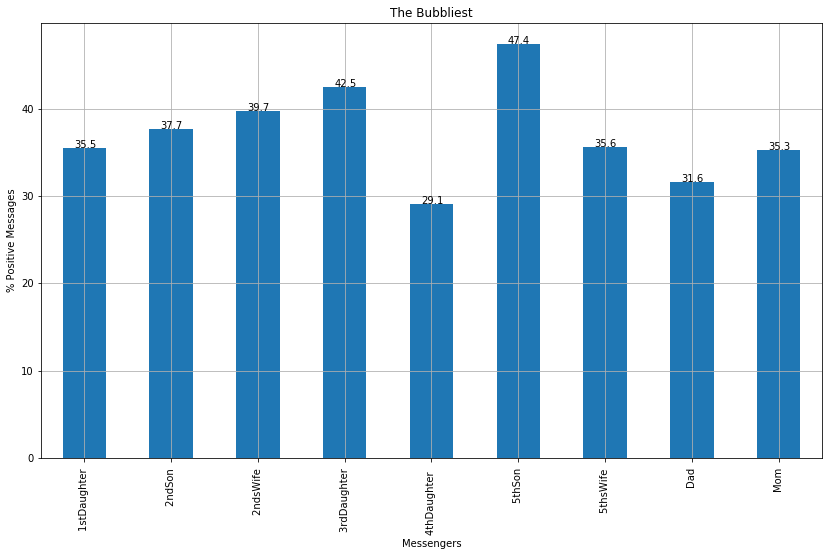

In [25]:
ax = perPerson['% Positive'].plot(kind='bar', 
                                  grid=True, 
                                  figsize=(14,8),
                                  title="The Bubbliest")
ax.set(xlabel="Messengers", ylabel="% Positive Messages")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))

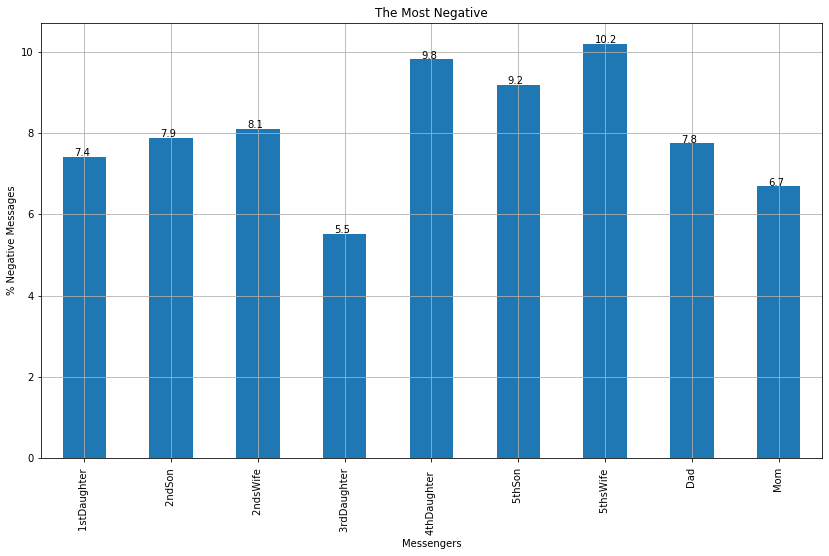

In [26]:
ax = perPerson['% Negative'].plot(kind='bar', 
                                  grid=True, 
                                  figsize=(14,8),
                                  title="The Most Negative")
ax.set(xlabel="Messengers", ylabel="% Negative Messages")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))

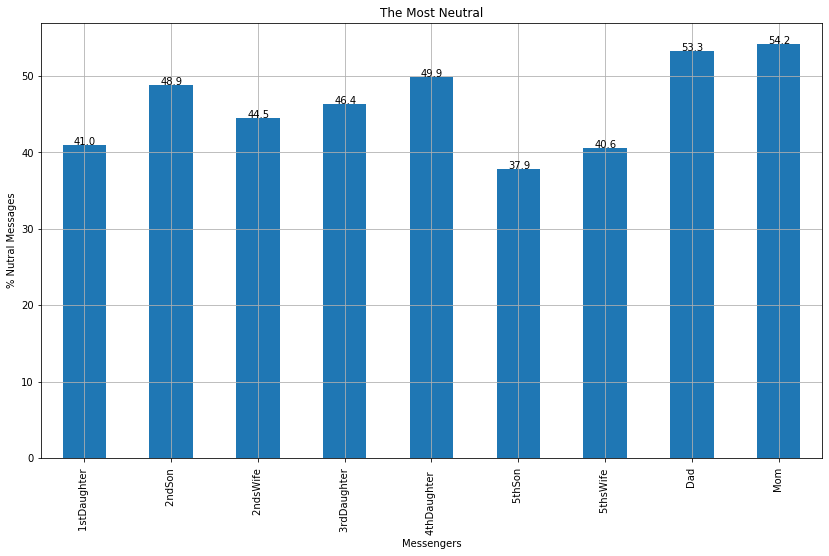

In [27]:
ax = perPerson['% Neutral'].plot(kind='bar', 
                                  grid=True, 
                                  figsize=(14,8),
                                  title="The Most Neutral")
ax.set(xlabel="Messengers", ylabel="% Nutral Messages")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))